In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

In [2]:
adata = sc.read("/Users/dominik.klein/data/pancreas_multiome_2022_processed.h5ad")

In [3]:
new_annotations = pd.read_csv("/Users/dominik.klein/paper_writing/moscot/endocrine_refinement.csv")
new_annotations.set_index(keys='Unnamed: 0' ,inplace=True)

In [4]:
adata.obs = adata.obs.merge(new_annotations, left_index=True, right_index=True)

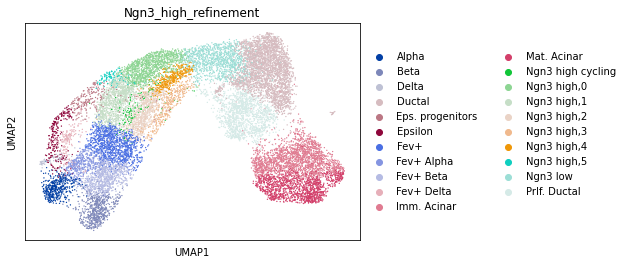

In [5]:
sc.pl.umap(adata, color="Ngn3_high_refinement")

In [6]:
def create_col(x):
    if x["celltype"] == "Ngn3 high":
        return x["Ngn3_high_refinement"]
    if x["celltype"] == "Fev+ Delta":
        return x["Fev_delta_refinement"]
    return x["celltype"]

adata.obs["refinement"] = adata.obs.apply(create_col, axis=1)

In [7]:
adata_gene_act = sc.read("/Users/dominik.klein/data/gene_activities.h5ad")

In [8]:
adata_gene_act.shape

(16918, 21615)

In [9]:
genes_present = list(set(adata.var.index).intersection(set(adata_gene_act.var.index)))

In [10]:
adata_gene_act = adata_gene_act[:, genes_present]

In [11]:
adata_gene_act.shape

(16918, 13209)

In [12]:
df_markers = pd.read_csv("/Users/dominik.klein/data/eps_markers_processed.csv")

In [13]:
df_markers.head()

,Unnamed: 0,gene,log_fold_change,pval
0,0,Foxd3,7.542560,4.780000e-34
1,1,Ghrl,6.669233,6.170000e-77
2,2,Gm12688,6.529931,3.596750e-04
3,3,Irs4,5.893363,1.210000e-38
4,4,Gpr37,5.392943,3.699497e-03


In [14]:
eps_markers = df_markers.sort_values(by="log_fold_change", ascending=False)["gene"][:100].values

In [15]:
eps_markers_present = list(set(eps_markers).intersection(adata_gene_act.var_names))

In [16]:
len(eps_markers_present)

41

In [17]:
adata_gene_act.obs = adata.obs.copy()

In [18]:
adata_gene_act.obsm = adata.obsm.copy()

In [19]:
adata_gene_act.obsp = adata.obsp.copy()

In [20]:
adata_gene_act.uns = adata.uns.copy()

In [21]:
sc.pp.normalize_per_cell(adata_gene_act)
sc.pp.log1p(adata_gene_act)

In [22]:
adata_2 = adata_gene_act[adata_gene_act.obs["celltype"].isin(["Fev+ Delta", "Fev+ Alpha", "Fev+ Beta", "Delta", "Epsilon", "Eps. progenitors", "Ngn3 high", "Alpha", "Beta", "Fev+"])].copy()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

adata_2.layers["min_max_scaled"] = scaler.fit_transform(adata_2.X.A.copy())

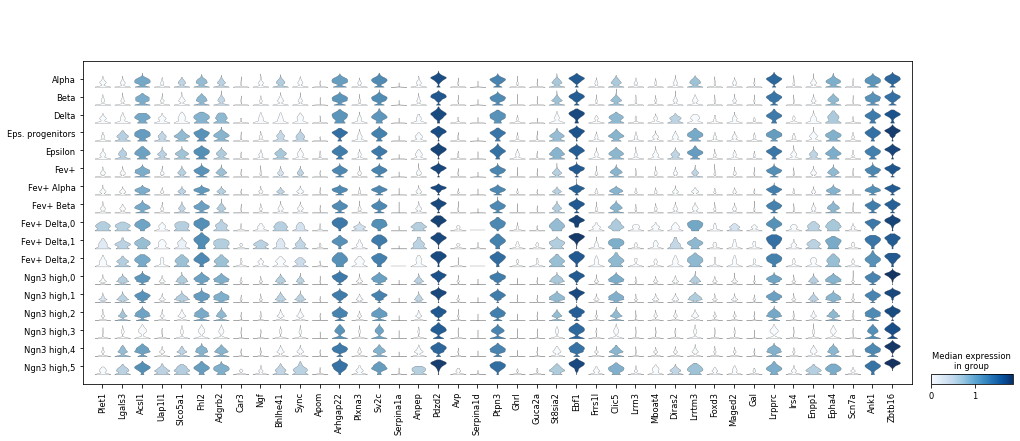

In [24]:
sc.pl.stacked_violin(adata_2, eps_markers_present, groupby='refinement')

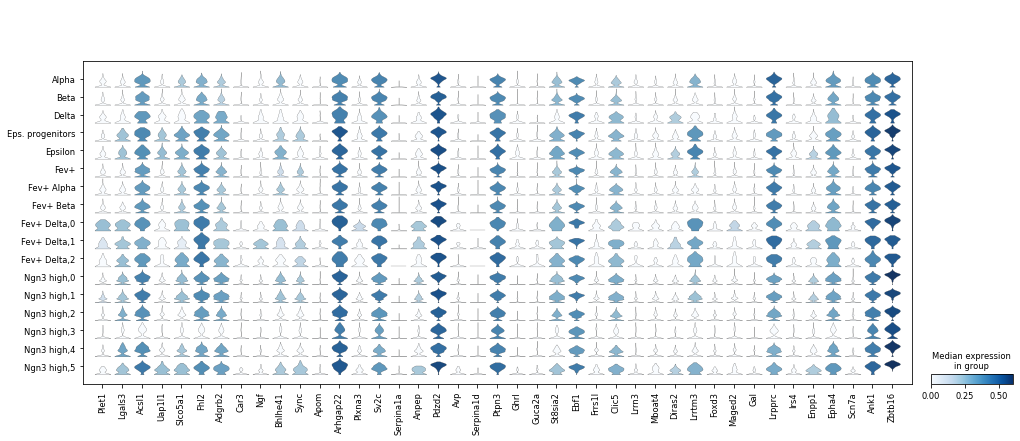

In [25]:
sc.pl.stacked_violin(adata_2, eps_markers_present, groupby='refinement', layer="min_max_scaled")

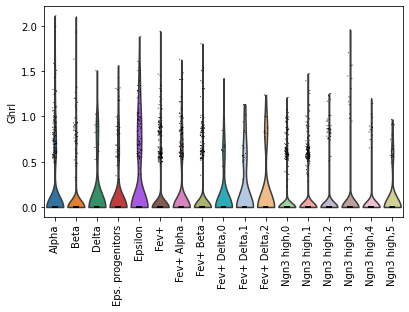

In [26]:
sc.pl.violin(adata_2, ["Ghrl"], groupby='refinement', rotation=90)


In [27]:
eps_markers = df_markers.sort_values(by="pval", ascending=False)["gene"][:100].values

In [28]:
eps_markers_present = list(set(eps_markers).intersection(adata_gene_act.var_names))

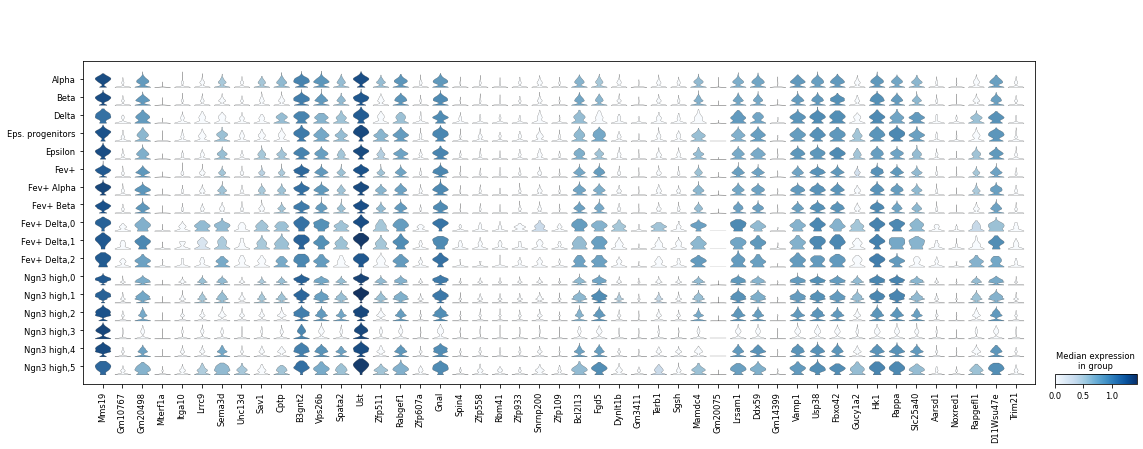

In [29]:
sc.pl.stacked_violin(adata_2, eps_markers_present, groupby='refinement')

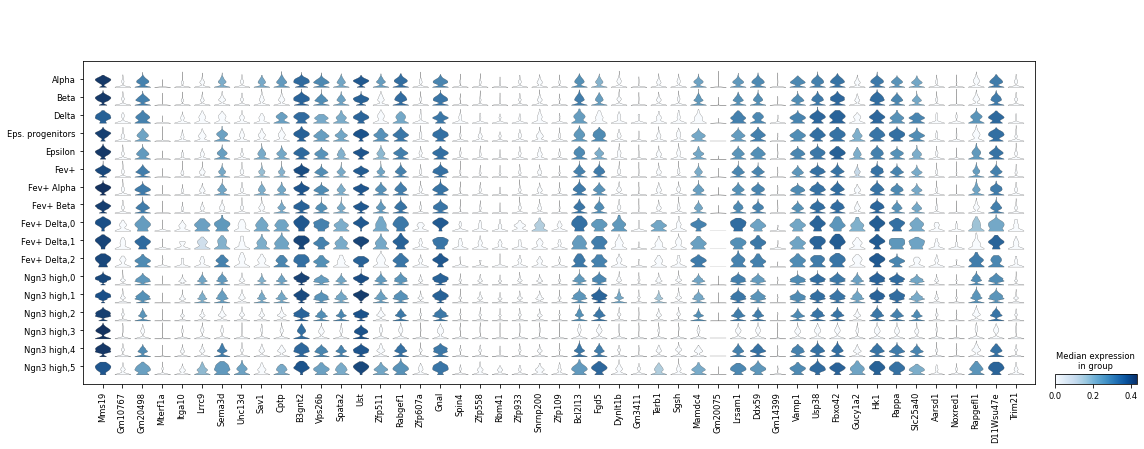

In [30]:
sc.pl.stacked_violin(adata_2, eps_markers_present, groupby='refinement', layer="min_max_scaled")

In [31]:
candidates = [
    "Slco5a1",
    "Lgals3",
    "Uap1l1",
    "Bhlhe41",
    "Lrrtm3",
    "Enpp1",
    "Gucy1a2",
    "Unc13d",
    "Lrrc9",
    
]
    

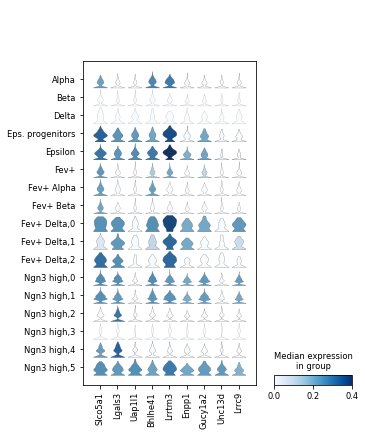

In [32]:
sc.pl.stacked_violin(adata_2, candidates, groupby='refinement', layer="min_max_scaled")

In [33]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

In [34]:
adata = adata[adata.obs["celltype"].isin(["Fev+ Delta", "Fev+ Alpha", "Fev+ Beta", "Delta", "Epsilon", "Eps. progenitors", "Ngn3 high", "Alpha", "Beta", "Fev+"])].copy()


In [35]:
scaler = MinMaxScaler()

adata.layers["min_max_scaled"] = scaler.fit_transform(adata.X.A.copy())

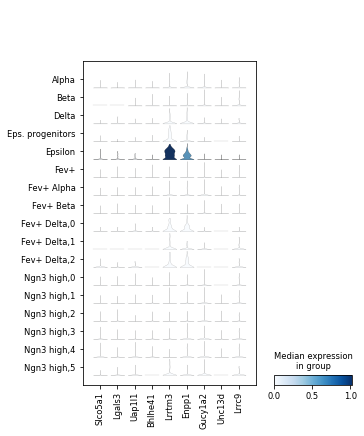

In [36]:
sc.pl.stacked_violin(adata, candidates, groupby='refinement')

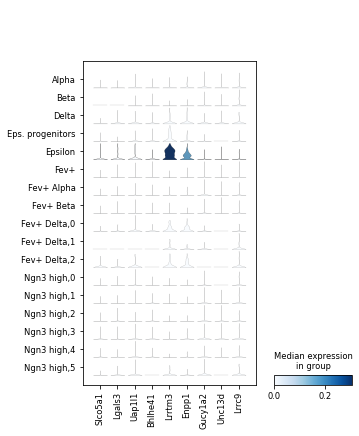

In [37]:
sc.pl.stacked_violin(adata, candidates, groupby='refinement', layer="min_max_scaled")

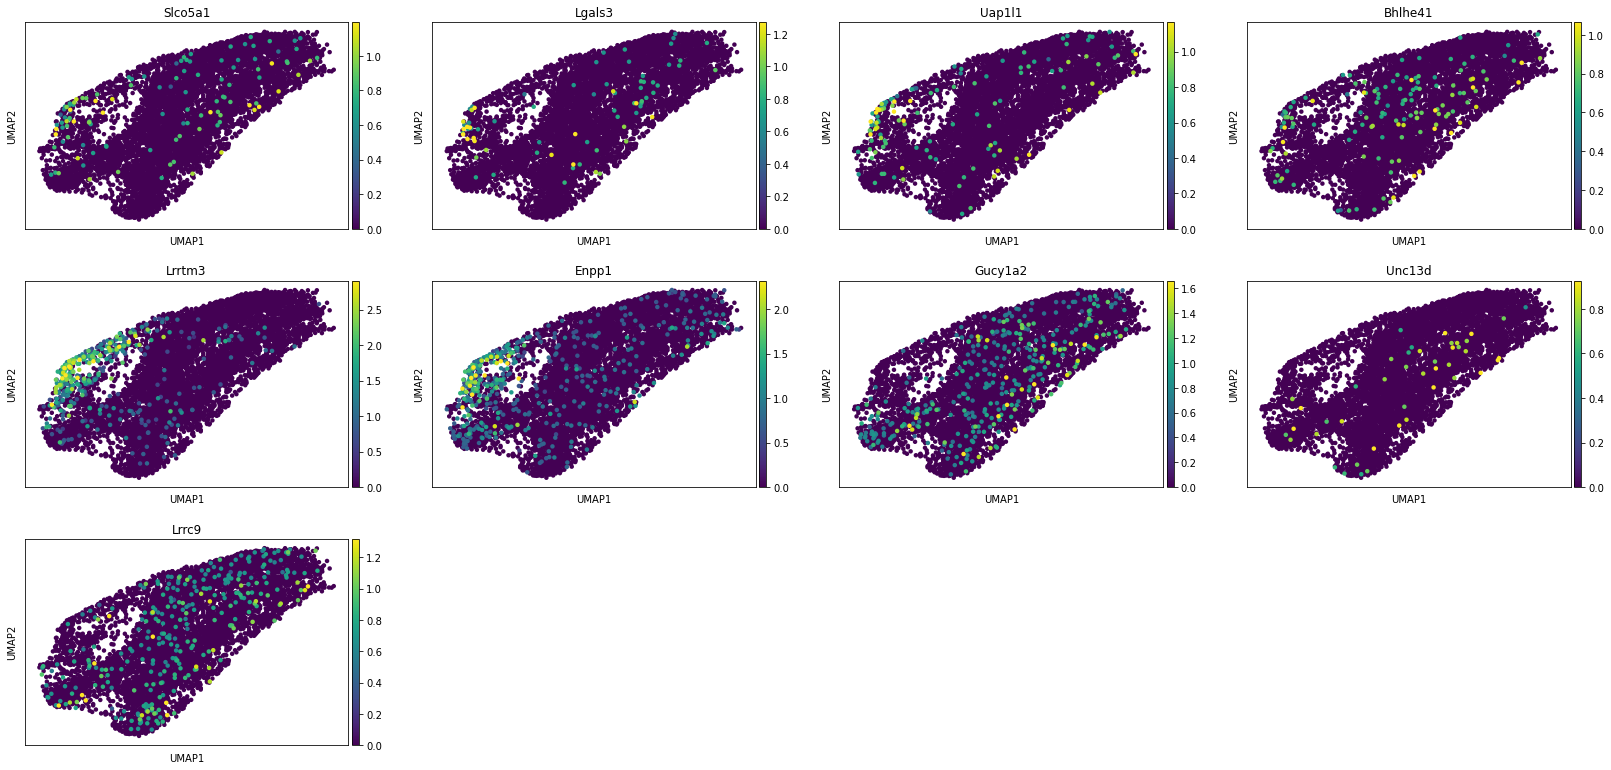

In [38]:
sc.pl.umap(adata, color=candidates, size=80, vmax="p99.9")

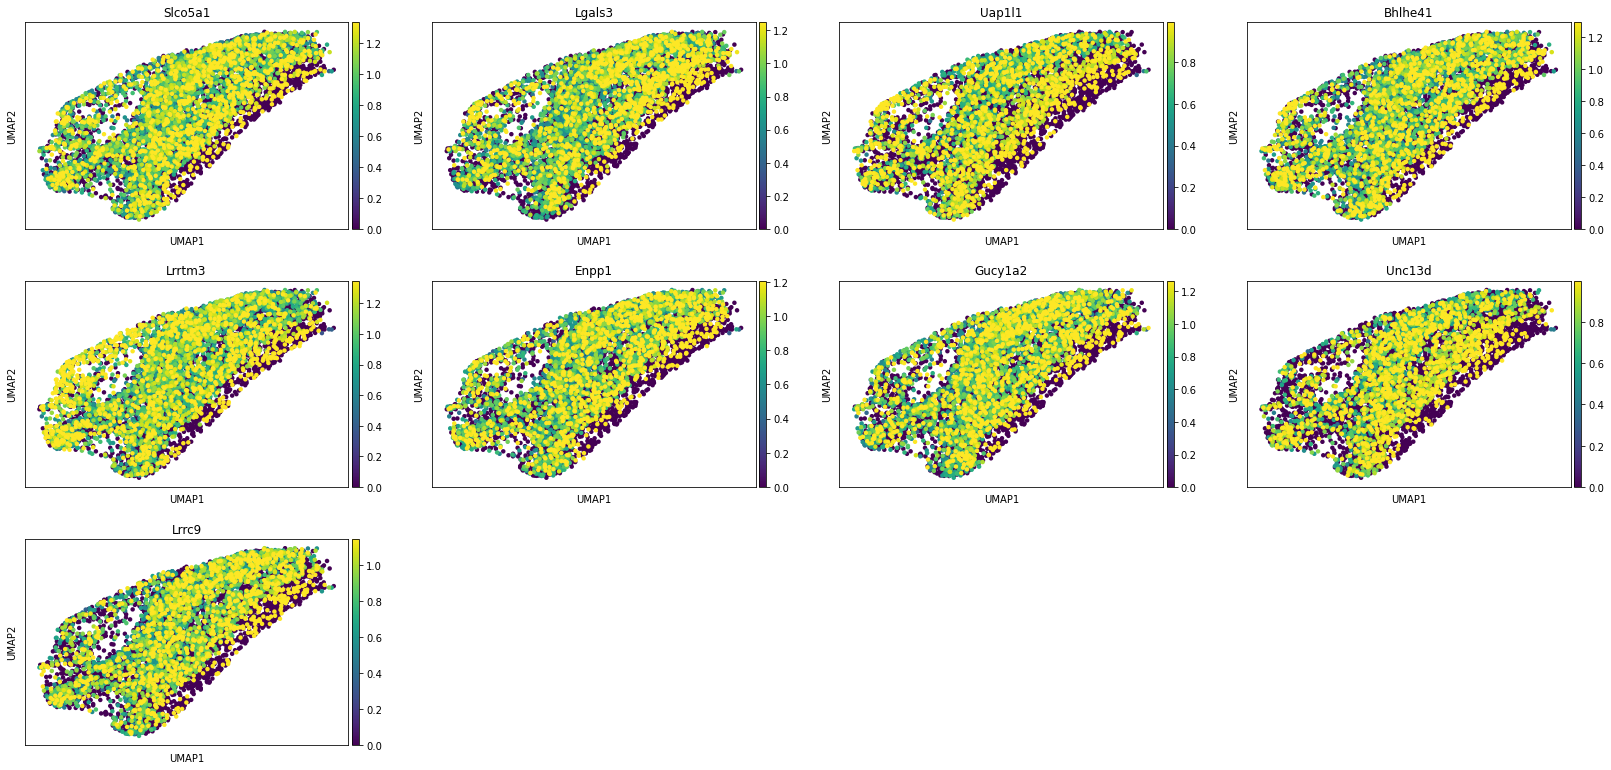

In [39]:
sc.pl.umap(adata_2, color=candidates, size=80, vmax="p90")